In [1]:
#Importing the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
import cv2
import seaborn as sns
%matplotlib inline

from keras.preprocessing import image
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

import tensorflow as tf
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Dropout, Flatten, MaxPool1D, Convolution1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import (BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense)
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Flatten, Conv2D, AveragePooling2D,MaxPool2D

import efficientnet.keras 
from tensorflow.keras.applications.efficientnet import EfficientNetB0

#from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

In [2]:
#Loading the paths for the datasets
covid = os.listdir("E:\\train\\COVID19")
normal = os.listdir("E:\\train\\NORMAL")
pneumonia = os.listdir("E:\\train\\PNEUMONIA")
tuber = os.listdir("E:\\train\\TURBERCULOSIS")

In [3]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

#Defining a funtion names "sampleimage" to view all types of images
def sampleimage(image_path):
    img = load_img(image_path)
    print((img_to_array(img)).shape)
    plt.imshow(img)
    plt.show()

COVID19
(885, 1036, 3)


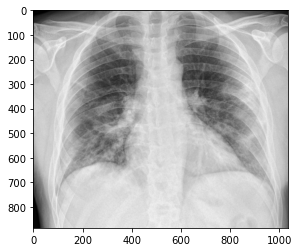

NORMAL
(1858, 2090, 3)


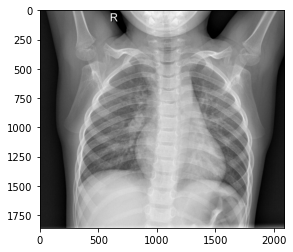

PNEUMONIA
(439, 712, 3)


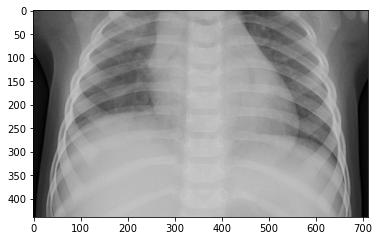

TURBERCULOSIS
(512, 512, 3)


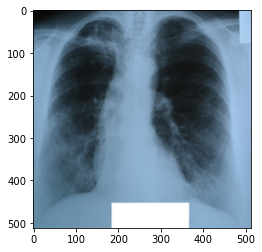

In [4]:
labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']

#COVID 19 image 
image_path="E:\\train\\COVID19\\COVID19(110).jpg"
print(labels[0])
sampleimage(image_path)
#Normal image 
print(labels[1])
image_path = "E:\\train\\NORMAL\\IM-0115-0001.jpeg"
sampleimage(image_path)
#Pneumonia image
print(labels[2])
image_path="E:\\train\\PNEUMONIA\\person1_bacteria_1.jpeg"
sampleimage(image_path)
#Turberculosis image
print(labels[3])
image_path = "E:\\train\\TURBERCULOSIS\\Tuberculosis-1.png"
sampleimage(image_path)

In [5]:
labels = ['COVID19', 'NORMAL', 'PNEUMONIA', 'TURBERCULOSIS']
x = []
Y = []
for i in labels:
    folder_path = os.path.join("E:", "train", i)
    for j in os.listdir(folder_path):
        img = cv2.imread(os.path.join(folder_path, j))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (64, 64))
        x.append(img)
        Y.append(i)

In [6]:
x = np.array(x)
Y = np.array(Y)

print(x.shape)
print(Y.shape)

(6326, 64, 64, 3)
(6326,)


In [7]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = []
for i in Y:
    y.append(labels.index(i))
y = le.fit_transform(y)
y = tf.keras.utils.to_categorical(y)

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, random_state=21)

In [9]:
print("Train data shape       : ", x_train.shape[0])
print("Test data shape        : ", x_test.shape[0])
print("Train Input shape      : ", x_train.shape)
print("Train output shape     : ", y_train.shape)
print("Test input shape       : ", x_test.shape)
print("Test output shape      : ", y_test.shape)
print("Validation input shape : ", x_valid.shape)
print("Validation output shape: ", y_valid.shape)

Train data shape       :  4048
Test data shape        :  1266
Train Input shape      :  (4048, 64, 64, 3)
Train output shape     :  (4048, 4)
Test input shape       :  (1266, 64, 64, 3)
Test output shape      :  (1266, 4)
Validation input shape :  (1012, 64, 64, 3)
Validation output shape:  (1012, 4)


In [10]:
from tensorflow.keras.applications.resnet import ResNet152
resnet = ResNet152(include_top=False,
                  input_shape=(64, 64, 3),
                  pooling = 'avg',
                  weights= 'imagenet')
resnet.summary()

Model: "resnet152"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 64, 64, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 70, 70, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 32, 32, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 32, 32, 64)   256         ['conv1_conv[0][0]']             
                                                                                          

                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 16, 16, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 16, 16, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 16, 16, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_block3_3_bn (BatchNormal  (None, 16, 16, 256)  1024       ['conv2_block3_3_conv[0][0]']    
 ization) 

                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 8, 8, 128)   512         ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 8, 8, 128)   0           ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block3_3_conv[0][0]']    
 ization) 

 n)                                                                                               
                                                                                                  
 conv3_block6_3_conv (Conv2D)   (None, 8, 8, 512)    66048       ['conv3_block6_2_relu[0][0]']    
                                                                                                  
 conv3_block6_3_bn (BatchNormal  (None, 8, 8, 512)   2048        ['conv3_block6_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block6_add (Add)         (None, 8, 8, 512)    0           ['conv3_block5_out[0][0]',       
                                                                  'conv3_block6_3_bn[0][0]']      
                                                                                                  
 conv3_blo

                                                                                                  
 conv4_block1_0_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block1_0_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_3_bn (BatchNormal  (None, 4, 4, 1024)  4096        ['conv4_block1_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block1_0_bn[0][0]',      
                                                                  'conv4_block1_3_bn[0][0]']      
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block4_add (Add)         (None, 4, 4, 1024)   0           ['conv4_block3_out[0][0]',       
                                                                  'conv4_block4_3_bn[0][0]']      
                                                                                                  
 conv4_block4_out (Activation)  (None, 4, 4, 1024)   0           ['conv4_block4_add[0][0]']       
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, 4, 4, 256)    262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block5_1_conv[0][0]']    
 ization) 

 conv4_block7_out (Activation)  (None, 4, 4, 1024)   0           ['conv4_block7_add[0][0]']       
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 4, 4, 256)    262400      ['conv4_block7_out[0][0]']       
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, 4, 4, 256)   1024        ['conv4_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, 4, 4, 256)   0           ['conv4_block8_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 4, 4, 256)   0           ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block11_2_conv (Conv2D)  (None, 4, 4, 256)    590080      ['conv4_block11_1_relu[0][0]']   
                                                                                                  
 conv4_block11_2_bn (BatchNorma  (None, 4, 4, 256)   1024        ['conv4_block11_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block14_2_conv (Conv2D)  (None, 4, 4, 256)    590080      ['conv4_block14_1_relu[0][0]']   
                                                                                                  
 conv4_block14_2_bn (BatchNorma  (None, 4, 4, 256)   1024        ['conv4_block14_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block14_2_relu (Activati  (None, 4, 4, 256)   0           ['conv4_block14_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block14_3_conv (Conv2D)  (None, 4, 4, 1024)   263168      ['conv4_block14_2_relu[0][0]']   
                                                                                                  
 conv4_blo

 conv4_block17_2_relu (Activati  (None, 4, 4, 256)   0           ['conv4_block17_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block17_3_conv (Conv2D)  (None, 4, 4, 1024)   263168      ['conv4_block17_2_relu[0][0]']   
                                                                                                  
 conv4_block17_3_bn (BatchNorma  (None, 4, 4, 1024)  4096        ['conv4_block17_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block17_add (Add)        (None, 4, 4, 1024)   0           ['conv4_block16_out[0][0]',      
                                                                  'conv4_block17_3_bn[0][0]']     
          

 conv4_block20_3_bn (BatchNorma  (None, 4, 4, 1024)  4096        ['conv4_block20_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block20_add (Add)        (None, 4, 4, 1024)   0           ['conv4_block19_out[0][0]',      
                                                                  'conv4_block20_3_bn[0][0]']     
                                                                                                  
 conv4_block20_out (Activation)  (None, 4, 4, 1024)  0           ['conv4_block20_add[0][0]']      
                                                                                                  
 conv4_block21_1_conv (Conv2D)  (None, 4, 4, 256)    262400      ['conv4_block20_out[0][0]']      
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block23_out (Activation)  (None, 4, 4, 1024)  0           ['conv4_block23_add[0][0]']      
                                                                                                  
 conv4_block24_1_conv (Conv2D)  (None, 4, 4, 256)    262400      ['conv4_block23_out[0][0]']      
                                                                                                  
 conv4_block24_1_bn (BatchNorma  (None, 4, 4, 256)   1024        ['conv4_block24_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block24_1_relu (Activati  (None, 4, 4, 256)   0           ['conv4_block24_1_bn[0][0]']     
 on)                                                                                              
          

 conv4_block27_1_bn (BatchNorma  (None, 4, 4, 256)   1024        ['conv4_block27_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block27_1_relu (Activati  (None, 4, 4, 256)   0           ['conv4_block27_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block27_2_conv (Conv2D)  (None, 4, 4, 256)    590080      ['conv4_block27_1_relu[0][0]']   
                                                                                                  
 conv4_block27_2_bn (BatchNorma  (None, 4, 4, 256)   1024        ['conv4_block27_2_conv[0][0]']   
 lization)                                                                                        
          

                                                                                                  
 conv4_block30_2_conv (Conv2D)  (None, 4, 4, 256)    590080      ['conv4_block30_1_relu[0][0]']   
                                                                                                  
 conv4_block30_2_bn (BatchNorma  (None, 4, 4, 256)   1024        ['conv4_block30_2_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block30_2_relu (Activati  (None, 4, 4, 256)   0           ['conv4_block30_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block30_3_conv (Conv2D)  (None, 4, 4, 1024)   263168      ['conv4_block30_2_relu[0][0]']   
          

                                                                                                  
 conv4_block33_2_relu (Activati  (None, 4, 4, 256)   0           ['conv4_block33_2_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_block33_3_conv (Conv2D)  (None, 4, 4, 1024)   263168      ['conv4_block33_2_relu[0][0]']   
                                                                                                  
 conv4_block33_3_bn (BatchNorma  (None, 4, 4, 1024)  4096        ['conv4_block33_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block33_add (Add)        (None, 4, 4, 1024)   0           ['conv4_block32_out[0][0]',      
          

                                                                                                  
 conv4_block36_3_bn (BatchNorma  (None, 4, 4, 1024)  4096        ['conv4_block36_3_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block36_add (Add)        (None, 4, 4, 1024)   0           ['conv4_block35_out[0][0]',      
                                                                  'conv4_block36_3_bn[0][0]']     
                                                                                                  
 conv4_block36_out (Activation)  (None, 4, 4, 1024)  0           ['conv4_block36_add[0][0]']      
                                                                                                  
 conv5_block1_1_conv (Conv2D)   (None, 2, 2, 512)    524800      ['conv4_block36_out[0][0]']      
          

                                                                                                  
 conv5_block3_3_bn (BatchNormal  (None, 2, 2, 2048)  8192        ['conv5_block3_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block3_add (Add)         (None, 2, 2, 2048)   0           ['conv5_block2_out[0][0]',       
                                                                  'conv5_block3_3_bn[0][0]']      
                                                                                                  
 conv5_block3_out (Activation)  (None, 2, 2, 2048)   0           ['conv5_block3_add[0][0]']       
                                                                                                  
 avg_pool (GlobalAveragePooling  (None, 2048)        0           ['conv5_block3_out[0][0]']       
 2D)      

In [12]:
model = Sequential() 
model.add(resnet)
model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(2048, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(1024, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dense(512, activation='relu'))
# model.add(Dense(128, activation='relu'))
# model.add(BatchNormalization())
model.add(Dense(4, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 4)                 8196      
                                                                 
Total params: 58,379,140
Trainable params: 58,227,716
Non-trainable params: 151,424
_________________________________________________________________


In [18]:
hist = model.fit(x_train, y_train, batch_size=32, epochs= 15,
                  validation_data = (x_valid, y_valid))

Epoch 1/15
127/127 [==============================] - 1165s 9s/step - loss: 0.5430 - accuracy: 0.8822 - val_loss: 9984.2217 - val_accuracy: 0.6245
Epoch 2/15
127/127 [==============================] - 1189s 9s/step - loss: 0.2592 - accuracy: 0.9284 - val_loss: 1.3470 - val_accuracy: 0.7312
Epoch 3/15
127/127 [==============================] - 1181s 9s/step - loss: 0.1526 - accuracy: 0.9457 - val_loss: 0.4164 - val_accuracy: 0.9308
Epoch 4/15
127/127 [==============================] - 1161s 9s/step - loss: 0.0911 - accuracy: 0.9699 - val_loss: 0.1110 - val_accuracy: 0.9713
Epoch 5/15
127/127 [==============================] - 1318s 10s/step - loss: 0.0735 - accuracy: 0.9733 - val_loss: 0.5681 - val_accuracy: 0.8617
Epoch 6/15
127/127 [==============================] - 1199s 9s/step - loss: 0.0716 - accuracy: 0.9770 - val_loss: 0.1112 - val_accuracy: 0.9674
Epoch 7/15
127/127 [==============================] - 1171s 9s/step - loss: 0.0452 - accuracy: 0.9862 - val_loss: 0.1739 - val_accur

In [19]:
model.save('resnet_CNN.h5')

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)
print('Test accuracy is: ', accuracy)
print("Test loss is    : ", loss)

40/40 [==============================] - 41s 1s/step - loss: 0.1271 - accuracy: 0.9668
Test accuracy is:  0.9668246507644653
Test loss is    :  0.12705403566360474


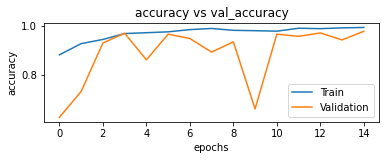

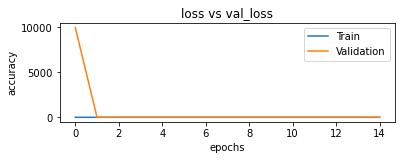

In [21]:
plt.subplot(211)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy vs val_accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

plt.subplot(212)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss vs val_loss')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Train', 'Validation'])
plt.show()

In [22]:
from sklearn.metrics import classification_report, confusion_matrix,f1_score
pred = model.predict(x_test)
pred.argmax(axis=1)
cm = confusion_matrix(y_test.argmax(axis=1), pred.argmax(axis=1))
print(cm)

40/40 [==============================] - 42s 966ms/step
[[ 84   1   2   3]
 [  0 277   9   0]
 [  3  21 743   0]
 [  2   0   1 120]]


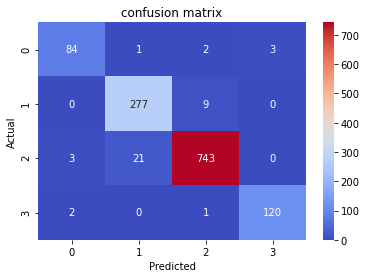

In [23]:
import seaborn as sns

#cn1 = pd.DataFrame(cm, columns=labels, index=labels)
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='.0f')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('confusion matrix')
plt.show()

In [24]:
#Classification report
print(classification_report(y_test.argmax(axis=1), pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94        90
           1       0.93      0.97      0.95       286
           2       0.98      0.97      0.98       767
           3       0.98      0.98      0.98       123

    accuracy                           0.97      1266
   macro avg       0.96      0.96      0.96      1266
weighted avg       0.97      0.97      0.97      1266



In [25]:
print("F1 Score: ", f1_score(y_test.argmax(axis=1), pred.argmax(axis=1), average='macro'))

F1 Score:  0.9593781752743944


In [26]:
import pickle
pickle.dump(model, open('resnet_cnn.pkl', 'wb'))

INFO:tensorflow:Assets written to: ram://7da0d74b-4b07-40ed-b3fc-f21768514bb8/assets


INFO:tensorflow:Assets written to: ram://7da0d74b-4b07-40ed-b3fc-f21768514bb8/assets


In [27]:
import joblib
joblib.dump(model, 'resnet_cnn_joblib.pkl')

INFO:tensorflow:Assets written to: ram://1ed8f81f-f077-44d5-a424-edd331aae0a4/assets


INFO:tensorflow:Assets written to: ram://1ed8f81f-f077-44d5-a424-edd331aae0a4/assets


['resnet_cnn_joblib.pkl']